# Do NBA Teams have an Advantage due to Scheduling?

### Load packages and data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
nba = pd.read_csv("NBA Game Data 2016-2017.csv")

## Calculate and plot homefield advantage

In [3]:
nba_games = nba.loc[nba.Notes.isna() & (nba["Home/Away"] == "Home")]

nba_by_day_of_week = nba_games.groupby(by="Week Day")["Tm", "Opp"].mean()
nba_by_day_of_week["Net Points"] = nba_by_day_of_week["Tm"] - nba_by_day_of_week["Opp"]
nba_by_day_of_week = nba_by_day_of_week.reindex(["Sun","Mon","Tue","Wed","Thu","Fri","Sat"])

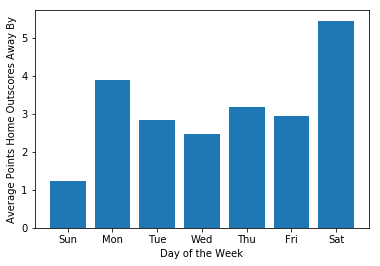

In [4]:
plt.bar(nba_by_day_of_week.index,nba_by_day_of_week["Net Points"])
plt.xlabel("Day of the Week")
plt.ylabel("Average Points Home Outscores Away By")
plt.show()

## Get data to find the effect of points on wins

In [5]:
team_summary = nba.groupby("Team")
team_summary = team_summary.agg({'W':'max',"Net Points":'sum'})

team_summary

,W,Net Points
Team,,
Atlanta Hawks,43,-70
Boston Celtics,53,216
Charlotte Hornets,36,16
Chicago Bulls,41,35
Cleveland Cavaliers,51,261
Dallas Mavericks,33,-240
Denver Nuggets,40,42
Detroit Pistons,37,-92
Golden State Warriors,67,954


### Correlation between Wins and Net Points

In [6]:
print("Correlation:", team_summary[["W", "Net Points"]].corr()["W"]["Net Points"])

Correlation: 0.9642663822322038


### Slope of linear model

In [7]:
lm = linear_model.LinearRegression()
x = team_summary["Net Points"].values.reshape(-1, 1)
y = team_summary["W"].values.reshape(-1, 1)
model = lm.fit(x,y)

print("Linear Model Slope:", lm.coef_[0][0])

Linear Model Slope: 0.030492998797778927


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


Because there is such a strong correlation between net points and wins, with the assumption of casuality, we can conclude that each net point has the effect of raising wins by 0.0304

## Find impact for each team

Take number of home and away games on each day of the week and multiply that by 0.0304 for home and -0.0304 for away games.

In [8]:
teams_games_on_weekday = nba.groupby(by=["Team","Home/Away","Week Day"])["G"].count()
team_home_away = pd.DataFrame(teams_games_on_weekday).join(pd.DataFrame(nba_by_day_of_week["Net Points"]))
team_home_away.loc[team_home_away.index.get_level_values('Home/Away').isin(['Away']),"Net Points"] *= -1
team_home_away["Point Impact"] = team_home_away["G"] * team_home_away["Net Points"]
team_home_away

G  Net Points  Point Impact
Team               Home/Away Week Day                              
Atlanta Hawks      Away      Fri        9   -2.932432    -26.391892
                             Mon        8   -3.885714    -31.085714
                             Sat        6   -5.445714    -32.674286
                             Sun        3   -1.231788     -3.695364
                             Thu        2   -3.184211     -6.368421
                             Tue        3   -2.828767     -8.486301
                             Wed       10   -2.463115    -24.631148
                   Home      Fri        8    2.932432     23.459459
                             Mon        5    3.885714     19.428571
                             Sat        6    5.445714     32.674286
                             Sun        6    1.231788      7.390728
                             Thu        3    3.184211      9.552632
                             Tue        4    2.828767     11.315068
                             Wed        9    2.463115     22.168033
Boston Celtics     Away      Fri        5   -2.932432    -14.662162
                             Mon        6   -3.885714    -23.314286
                             Sat        7   -5.445714    -38.120000
                             Sun        7   -1.231788     -8.622517
                             Thu        7   -3.184211    -22.289474
                             Tue        3   -2.828767     -8.486301
                             Wed        6   -2.463115    -14.778689
                   Home      Fri       13    2.932432     38.121622
                             Mon        5    3.885714     19.428571
                             Sat        2    5.445714     10.891429
                             Sun        4    1.231788      4.927152
                             Tue        2    2.828767      5.657534
                             Wed       15    2.463115     36.946721
Charlotte Hornets  Away      Fri        6   -2.932432    -17.594595
                             Mon        7   -3.885714    -27.200000
                             Sat        7   -5.445714    -38.120000
...                                    ..         ...           ...
Toronto Raptors    Home      Thu        3    3.184211      9.552632
                             Tue        5    2.828767     14.143836
                             Wed        6    2.463115     14.778689
Utah Jazz          Away      Fri        3   -2.932432     -8.797297
                             Mon        8   -3.885714    -31.085714
                             Sat        7   -5.445714    -38.120000
                             Sun        8   -1.231788     -9.854305
                             Thu        3   -3.184211     -9.552632
                             Tue        7   -2.828767    -19.801370
                             Wed        5   -2.463115    -12.315574
                   Home      Fri        9    2.932432     26.391892
                             Mon        6    3.885714     23.314286
                             Sat        8    5.445714     43.565714
                             Thu        5    3.184211     15.921053
                             Tue        4    2.828767     11.315068
                             Wed        9    2.463115     22.168033
Washington Wizards Away      Fri        7   -2.932432    -20.527027
                             Mon        8   -3.885714    -31.085714
                             Sat        6   -5.445714    -32.674286
                             Sun        4   -1.231788     -4.927152
                             Thu        4   -3.184211    -12.736842
                             Tue        3   -2.828767     -8.486301
                             Wed        9   -2.463115    -22.168033
                   Home      Fri        9    2.932432     26.391892
                             Mon        7    3.885714     27.200000
                             Sat        6    5.445714     32.674286
                            

By creating a pivot table of the above data, we can find the impact of scheduling on each teams wins over the season

In [9]:
team_summary = team_home_away.groupby("Team")["Point Impact"].sum()
team_summary *= 0.030492998797778927
team_summary

Team
Atlanta Hawks            -0.223951
Boston Celtics           -0.436062
Charlotte Hornets         0.354261
Chicago Bulls             0.776712
Cleveland Cavaliers       0.011013
Dallas Mavericks          0.272340
Denver Nuggets           -0.264449
Detroit Pistons           0.106630
Golden State Warriors     0.296829
Houston Rockets           0.418473
Indiana Pacers            0.192465
Los Angeles Clippers     -0.035269
Los Angeles Lakers       -1.002700
Memphis Grizzlies        -0.297739
Miami Heat                0.193829
Milwaukee Bucks           0.215812
Minnesota Timberwolves    0.047481
New Orleans Pelicans     -0.303723
New York Knicks          -0.252541
New York Nets            -0.780008
Oklahoma City             0.224940
Orlando Magic            -0.130666
Philadelphia 76ers        0.187501
Phoenix Suns             -1.087964
Portland Trail Blazers    0.314332
Sacramento Kings         -0.006753
San Antonio Spurs         0.204393
Toronto Raptors          -0.150889
Utah Jazz      

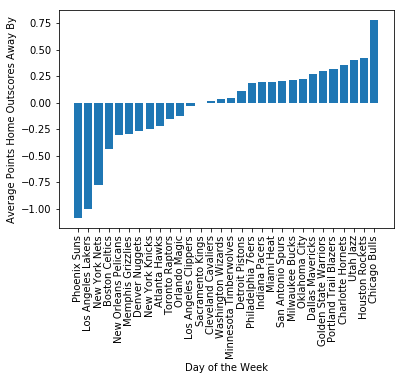

In [10]:
team_summary = team_summary.sort_values()

plt.bar(team_summary.index, team_summary)
plt.xlabel("Day of the Week")
plt.ylabel("Average Points Home Outscores Away By")
plt.xticks(rotation=90)
plt.show()

You can see teams like the Phoenix Suns are at a massive disadvantage by playing lots of away games on Saturdays. This is just one reason they aren’t doing well.